Consigna</br>
En este proyecto profundizarás lo desarrollado en el proyecto 01 (“Primer modelo de Machine Learning”). El objetivo es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto anterior. Luego, interpreta ese modelo para responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema estudiando el modelo que generamos?

El trabajo se organiza en tres partes:


<font color='red'>
    Librerias necesarias

In [1]:
import numpy as np # libleria matematica (matrices)
import pandas as pd # libreria para dataframes
import matplotlib.pyplot as plt # libreria para plotear bajo nivel
import seaborn as sns #libreria para plotear alto nivel
from pandas_profiling import ProfileReport #libreria para EDA
#from datetime import  datetime, date
import time


Bad key "text.kerning_factor" on line 4 in
d:\Users\SAC\.conda\envs\datascience\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
sns.set() #graficas al formato de seaborn

In [3]:
from sklearn.model_selection import train_test_split #separa data frames para tener datos de train y de test
from sklearn.linear_model import LinearRegression #modelo de regresion lineal
from sklearn.tree import DecisionTreeRegressor# modelo de arbol de regresion
from sklearn.neighbors import KNeighborsRegressor # modelo KNN de regresion
from sklearn.metrics import mean_squared_error #metrica de raiz media al cuadrado MSE y RMSE
from sklearn.metrics import mean_absolute_error #metrica de error promedio absoluto

In [4]:
#Boxplot x 6
def caja6(df, raros=False,paleta='winter',titulo=None): #funcion para trazar 6 graficas con boxplot por tipo de propiedad (dataframe,sin outliers, paleta de color)
    plt.figure(figsize = (8.4*3,4.8*2)) #tamaño de la grafica
    
    plt.subplot(2,3,1) #(renglones, columnas, posicion)
    sns.boxplot(data=df,x='property_type',y='rooms', showfliers =raros,palette =paleta )
        
    plt.subplot(2,3,2)
    sns.boxplot(data=df,x='property_type',y='bedrooms', showfliers = raros,palette =paleta )
    plt.title(titulo,color='r')

    plt.subplot(2,3,3)
    sns.boxplot(data=df,x='property_type',y='bathrooms', showfliers = raros,palette =paleta )

    plt.subplot(2,3,4)
    sns.boxplot(data=df,x='property_type',y='surface_total', showfliers = raros,palette =paleta )

    plt.subplot(2,3,5)
    sns.boxplot(data=df,x='property_type',y='surface_covered', showfliers = raros,palette =paleta )

    plt.subplot(2,3,6)
    sns.boxplot(data=df,x='property_type',y='price', showfliers = raros,palette =paleta )

    plt.tight_layout() #ajuste de los trazos
    plt.show()
# Correlacion
def correlacion(df,titulo=None): 
    corr = df.drop(columns = 'property_type').corr()
    plt.figure(figsize=(8,8))
    plt.title(titulo,color='r')
    sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
                xticklabels= df.drop(columns = 'property_type').columns, 
                yticklabels= df.drop(columns = 'property_type').columns,
                cmap= 'coolwarm')
    plt.xticks(rotation = 90)
    plt.yticks(rotation = 45)
    plt.show()

In [5]:
properati=pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
print('Tamaño del Dataset','(Renglones, Columnas)=',properati.shape)
properati.head(1)

Tamaño del Dataset (Renglones, Columnas)= (146660, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.60588,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta


In [6]:
EDA1 = ProfileReport (properati)
EDA1.to_file("properati EDA1.html")

d:\Users\SAC\.conda\envs\datascience\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<font color='red'>
Primero eliminare las columnas que tienen un valor unico, estas dimensiones, todo los datos esatan agrupados en un solo valor que no aportara diferencia en los calculos, estas son 'l1' , 'currency' y 'operation type'

In [7]:
properati=properati.drop(['l1','currency','operation_type'],axis=1)
properati.head(1)

,start_date,end_date,created_on,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
0,2019-10-17,2019-12-23,2019-10-17,-34.60588,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento


<font color='red'>
Ahora vere si el 'start_date' y 'created_on' son fechas iguales

In [8]:
properati['start_date']=pd.to_datetime(properati['start_date'], format="%Y-%m-%d")
#properati['end_date']=pd.to_datetime(properati['end_date'], format="%Y-%m-%d")
properati['created_on']=pd.to_datetime(properati['created_on'], format="%Y-%m-%d")
properati.loc[properati.start_date == properati.created_on].shape

(146660, 16)

In [9]:
properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   start_date       146660 non-null  datetime64[ns]
 1   end_date         146660 non-null  object        
 2   created_on       146660 non-null  datetime64[ns]
 3   lat              136735 non-null  float64       
 4   lon              136701 non-null  float64       
 5   l2               146660 non-null  object        
 6   l3               146660 non-null  object        
 7   rooms            146660 non-null  float64       
 8   bedrooms         146660 non-null  float64       
 9   bathrooms        140703 non-null  float64       
 10  surface_total    126133 non-null  float64       
 11  surface_covered  125046 non-null  float64       
 12  price            146660 non-null  float64       
 13  title            146660 non-null  object        
 14  description      146

In [10]:
properati[properati.end_date=='9999-12-31'].end_date.describe()

count          25101
unique             1
top       9999-12-31
freq           25101
Name: end_date, dtype: object

<font color='red'>
    Son iguales en la totalidad de las instancias, asi que una columna mas que se va, tambien pense en calcular los dias que tiene de publicado el anuncio, pero hay varios valores  que tienen fecha infinita, entoces se van todas las fechas para no perder tantas muestras, y analizo los duplicados antes de eliminar estas dimensiones

In [11]:
properati["is_duplicate"]= properati.duplicated()
properati[(properati.is_duplicate==True) ].shape

(2358, 17)

In [12]:
properati=properati.drop(['created_on','start_date','end_date'],axis=1)
properati=properati[(properati.is_duplicate==False)]

In [13]:
properati=properati.drop(['is_duplicate'],axis=1)
properati.shape

(144302, 13)

In [14]:
properati["is_duplicate"]= properati.duplicated()
properati[(properati.is_duplicate==True) ].shape

(27075, 14)

<font color='red'>
Tal parece que si hay bastantes anuncios publicados iguales en distintas fechas

In [15]:
properati=properati[(properati.is_duplicate==False)]
properati=properati.drop(['is_duplicate'],axis=1)
properati.shape

(117227, 13)

PARTE A - Transformación de Datos

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Justifica e implementa:

Detección y eliminación de Outliers

Encoding

Imputación de valores faltantes

Escalado de datos

Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Sea cual sea la respuesta, intenta explicar a qué se debe.

<font color='red'>
    ELiminare outliers con IQR. Es una tarea elemental detectar Outliers; y al si haber la mejor forma es con IQR

In [16]:
class IQR:
    def __init__(self,f):
        self.q75 = np.nanpercentile(f, 75)
        self.q25 = np.nanpercentile(f, 25)
        self.iqr = self.q75 - self.q25
        self.outliermaxL = self.q25 + (1.5*self.iqr)        
        self.outlierminL = self.q25 - (1.5*self.iqr)
        self.outliermaxX = self.q25 + (3 *self.iqr)
        self.outlierminX = self.q25 - (3 *self.iqr)

In [17]:
IQRprice=IQR(properati.price)
IQRsurface_covered=IQR(properati.surface_covered)
IQRsurface_total=IQR(properati.surface_total)
print(IQRprice.outliermaxX,IQRprice.outliermaxL,IQRprice.outlierminL,IQRprice.outlierminX)
print(IQRsurface_covered.outliermaxX,IQRsurface_covered.outliermaxL,IQRsurface_covered.outlierminL,IQRsurface_covered.outlierminX)
print(IQRsurface_total.outliermaxX,IQRsurface_total.outliermaxL,IQRsurface_total.outlierminL,IQRsurface_total.outlierminX)

562000.0 335500.0 -117500.0 -344000.0
245.0 146.0 -52.0 -151.0
358.0 205.0 -101.0 -254.0


In [18]:
properati.describe(percentiles=[0.25,0.75])

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,109440.000000,109407.000000,117227.000000,117227.000000,111422.000000,97297.00000,96309.000000,1.172270e+05
mean,-34.609127,-58.470010,3.092718,1.976652,1.604952,251.34886,122.052518,2.364688e+05
std,0.522648,0.541629,1.465745,1.179695,0.902177,2316.22511,1043.881944,3.201161e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.00000,1.000000,5.500000e+03
25%,-34.636856,-58.518000,2.000000,1.000000,1.000000,52.00000,47.000000,1.090000e+05
50%,-34.602587,-58.451508,3.000000,2.000000,1.000000,81.00000,69.000000,1.600000e+05
75%,-34.570743,-58.405704,4.000000,3.000000,2.000000,154.00000,113.000000,2.600000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.00000,126062.000000,3.243423e+07


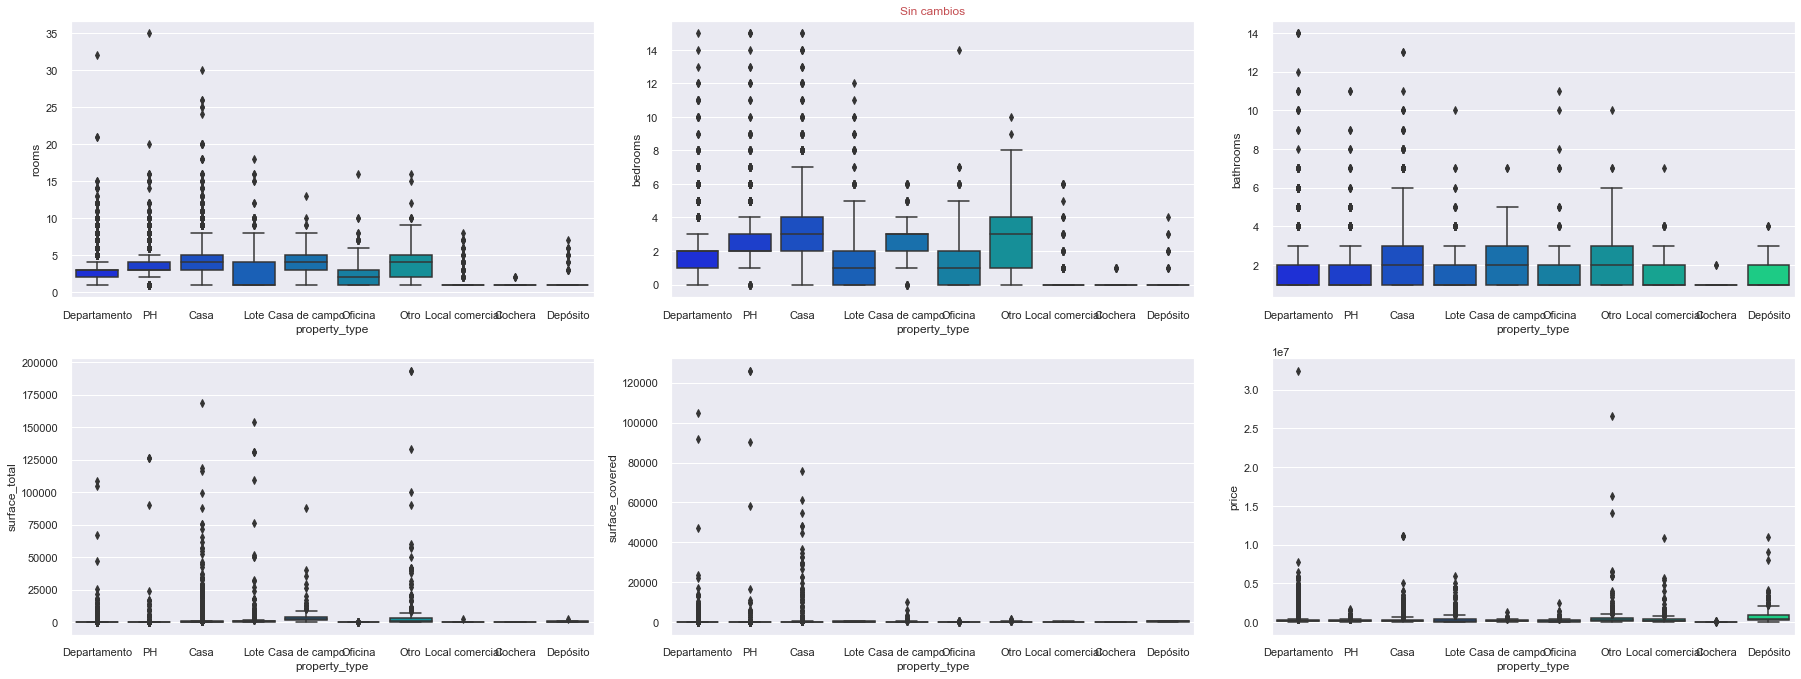

In [19]:
caja6(properati,raros=True, paleta='winter',titulo='Sin cambios')

In [20]:
properati=properati[properati.price <=(IQRprice.outliermaxL)]

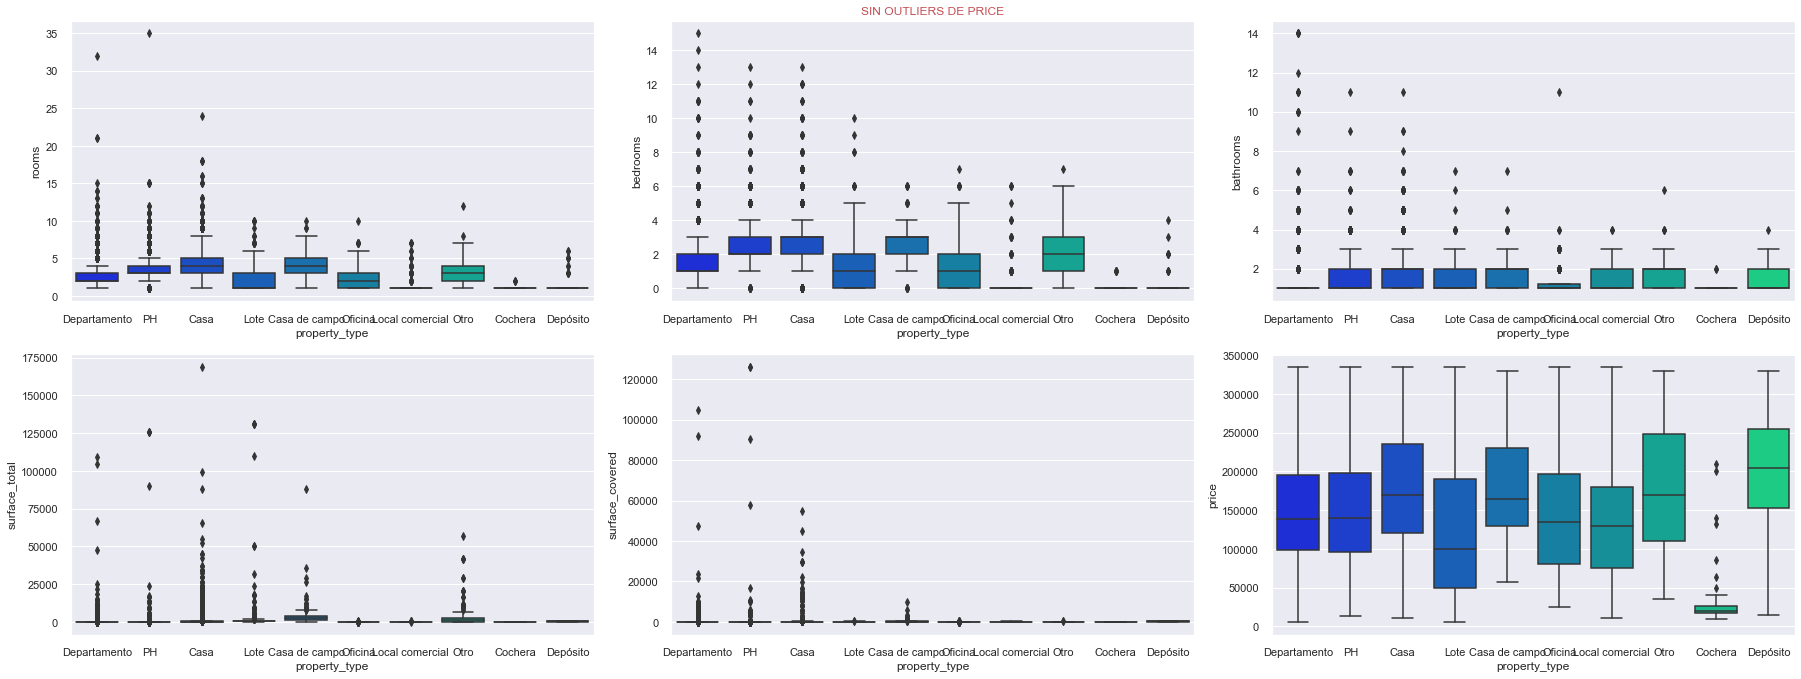

In [21]:
caja6(properati,raros=True, paleta='winter',titulo='SIN OUTLIERS DE PRICE')

In [22]:
properati=properati[properati.surface_total<= 1000]
properati=properati[properati.surface_covered<= properati.surface_total]

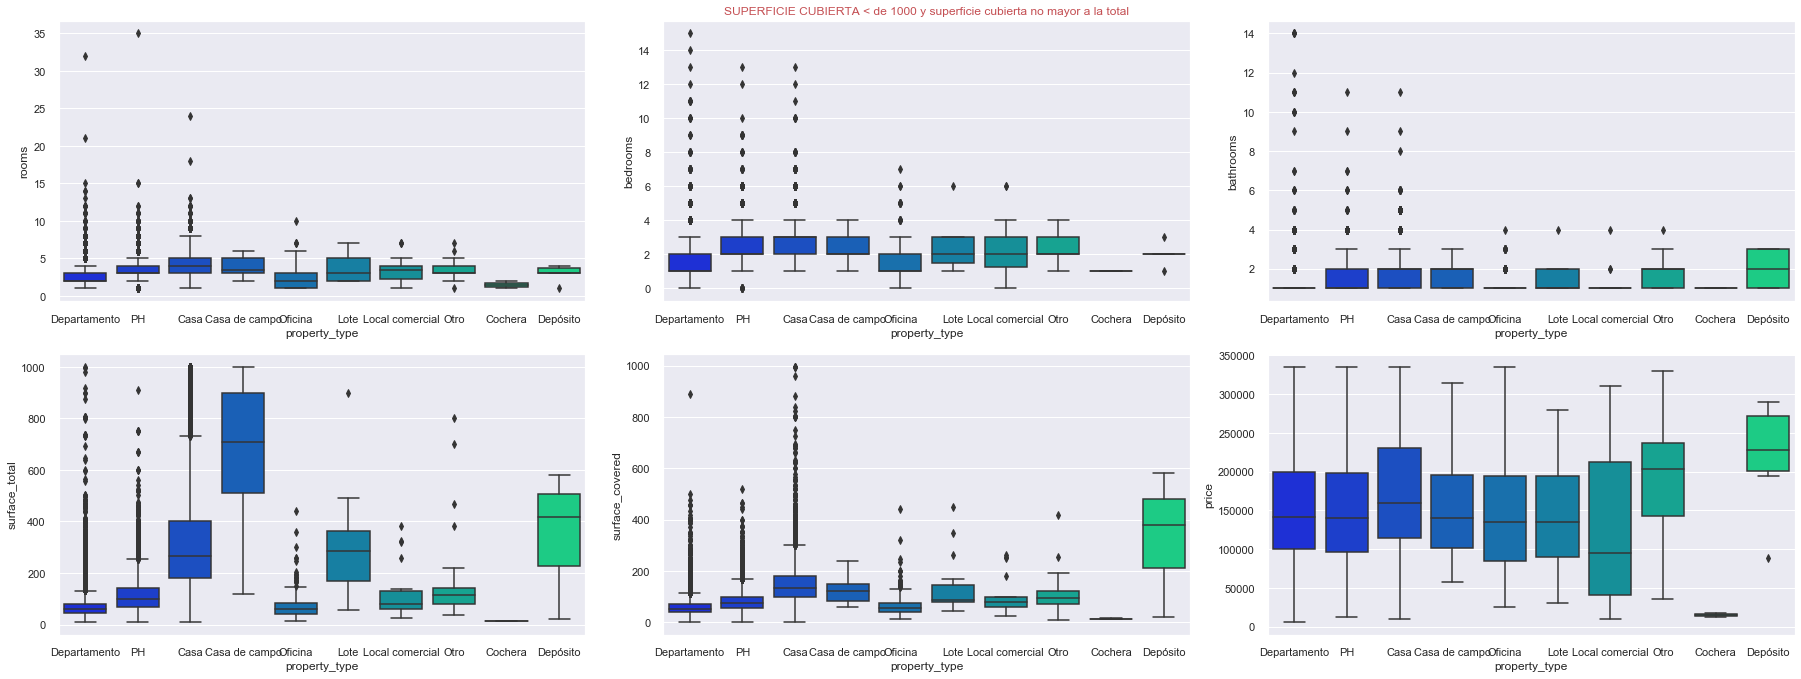

In [23]:
caja6(properati,raros=True, paleta='winter',titulo='SUPERFICIE CUBIERTA < de 1000 y superficie cubierta no mayor a la total')

In [24]:
properati=properati[~(properati.title.str.contains('Hostal|Hostel|Hotel',regex=True) & (properati.property_type.str.contains('Departamento|Casa|PH') ))]
properati=properati[~(properati.title.str.contains('Cochera',regex=True) & (properati.surface_total < 30)&(properati.property_type!='Cochera')) ]
properati=properati[~((properati.property_type==('Departamento','Casa','PH','Casa de campo'))& (properati.surface_total <= 15))]

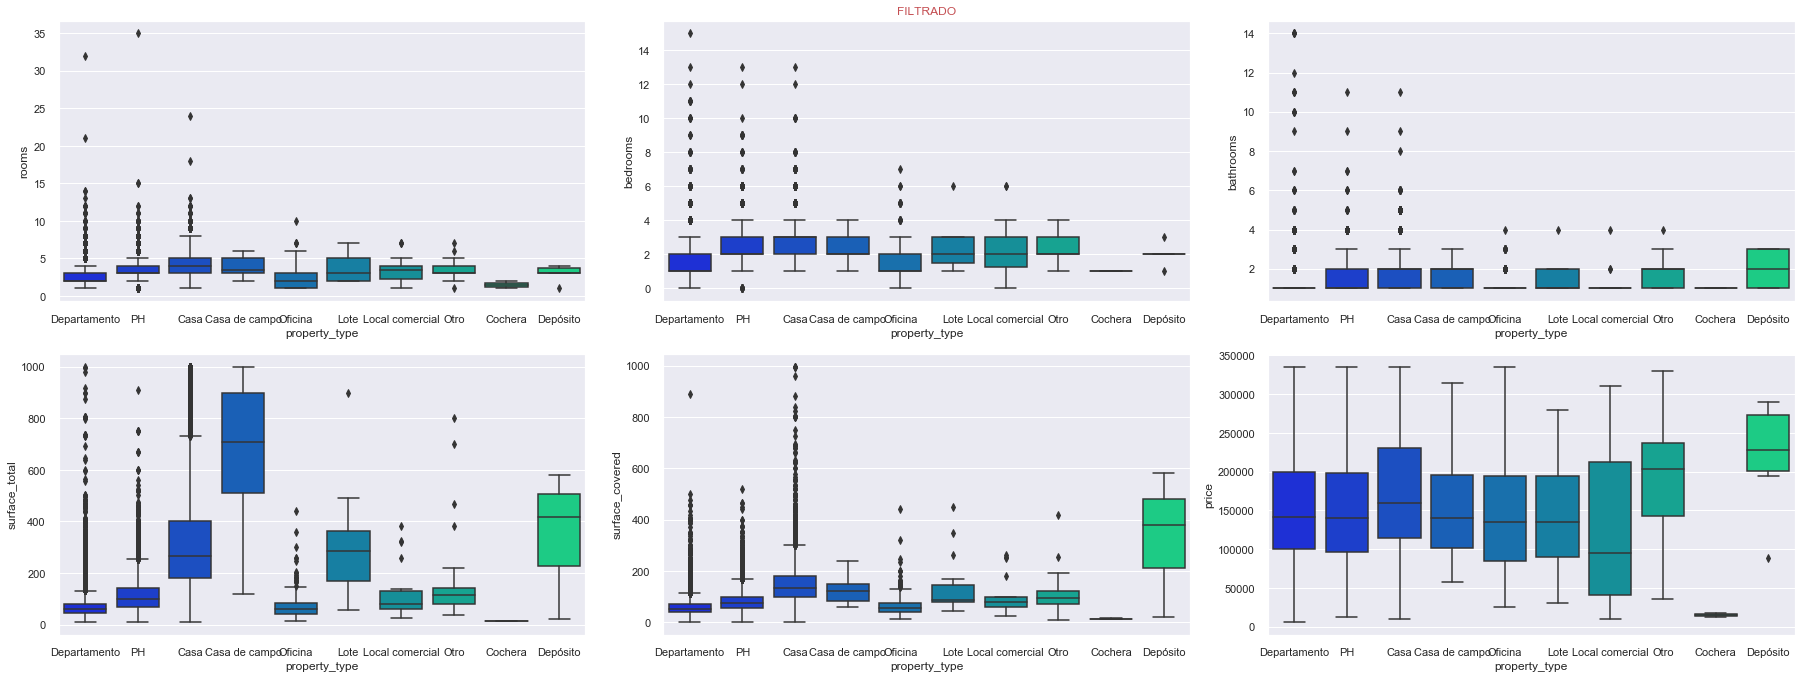

In [25]:
caja6(properati,raros=True,titulo='FILTRADO')

In [26]:
properati=properati.drop(['title','description'],axis=1)

In [27]:
properati.head(1)

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.60588,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento


In [28]:
EDA2 = ProfileReport (properati)
EDA2.to_file("properati EDA2.html")

<font color='red'>
    Ahora tengo un data frame listo para trabajar el ENCODING en las variables categoricas, (me gustaria eliminar la dimension l2 y l3 ya que son redundantes con lat y lon, pero vamos viendo como se desarrolla todo despues). Usare Label Encoder en l2, l3 y property_type. Lo usare asi para no crear mas features, y alentar el calculo, aunque pierda un poco de precision al final, y de todos modos el L3 tiene muchos valores diferentes y en esa feature en particular siempre usaria Label encoder.

In [29]:
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder

In [30]:
"checkpoint"
properati.to_pickle('properati.pkl')

In [31]:
properati=pd.read_pickle('properati.pkl')

In [32]:
label_encoder = LabelEncoder()
l2_encoded = label_encoder.fit_transform(properati.l2)
l3_encoded = label_encoder.fit_transform(properati.l3)
property_type_encoded = label_encoder.fit_transform(properati.property_type)

In [33]:
properati.l2=l2_encoded
properati.l3=l3_encoded
properati.property_type=property_type_encoded

<font color='red'>
    (una transformacion)

In [34]:
properati.head()

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.605880,-58.384949,3,63,7.0,7.0,2.0,140.0,140.0,153000.0,3
1,-34.624056,-58.412110,3,11,2.0,1.0,2.0,70.0,58.0,159000.0,9
2,-34.593569,-58.427474,3,48,2.0,1.0,1.0,45.0,45.0,125000.0,9
3,-34.581294,-58.436754,3,48,2.0,1.0,1.0,85.0,50.0,295000.0,9
4,-34.914194,-57.938219,2,33,2.0,1.0,1.0,50.0,35.0,40000.0,9


In [35]:
properati.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77602 entries, 0 to 146659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lat              72988 non-null  float64
 1   lon              72988 non-null  float64
 2   l2               77602 non-null  int32  
 3   l3               77602 non-null  int32  
 4   rooms            77602 non-null  float64
 5   bedrooms         77602 non-null  float64
 6   bathrooms        76210 non-null  float64
 7   surface_total    77602 non-null  float64
 8   surface_covered  77602 non-null  float64
 9   price            77602 non-null  float64
 10  property_type    77602 non-null  int32  
dtypes: float64(8), int32(3)
memory usage: 6.2 MB


<font color='red'>
Empiezo a imputar valores faltantes
   

In [36]:
properati.isnull().sum()

lat                4614
lon                4614
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          1392
surface_total         0
surface_covered       0
price                 0
property_type         0
dtype: int64

In [37]:
properati.bathrooms.value_counts(normalize=True).mul(100).round(3).astype(str)+' %'

1.0     70.125 %
2.0     25.161 %
3.0      4.017 %
4.0      0.572 %
5.0      0.075 %
6.0      0.021 %
11.0     0.008 %
7.0      0.005 %
14.0     0.005 %
10.0     0.005 %
9.0      0.004 %
12.0     0.001 %
8.0      0.001 %
Name: bathrooms, dtype: object

<font color='red'>
Para "bathrooms" primero ordenare el dataframe por la columna de "surface_covered", ya que con esta muestra una mejor correlacion de Pearson, de Spearman, de Kendall, y solo en Phik "bedrooms" es mas alta la correlacion. Y usare un llenado hacia adelante, y asi evito poner de moda el promedio

In [38]:
properati = properati.sort_values(by="surface_covered")

In [39]:
properati.bathrooms.fillna(method ='ffill', inplace = True)

In [40]:
properati = properati.sort_index()

In [41]:
properati.bathrooms.value_counts(normalize=True).mul(100).round(3).astype(str)+' %'

1.0     70.081 %
2.0     25.169 %
3.0      4.039 %
4.0      0.585 %
5.0      0.076 %
6.0      0.021 %
11.0     0.008 %
7.0      0.005 %
14.0     0.005 %
10.0     0.005 %
9.0      0.004 %
12.0     0.001 %
8.0      0.001 %
Name: bathrooms, dtype: object

<font color='red'>
Para "lat" y "lon" ordenare el dataframe por "l3", porque tiene mayor correlacion con ambas variables segun la correlacion de Phik. Tambien hare un llenado hacia adelante para evitar que el promedio se vuelva moda, y me de un llenado mas realista.

In [42]:
properati = properati.sort_values(by="l3")

In [43]:
properati.lat.fillna(method='ffill', inplace=True)

In [44]:
properati.lon.fillna(method='ffill', inplace=True)

In [45]:
properati = properati.sort_index()

In [46]:
properati.isnull().sum()

lat                0
lon                0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

<font color='red'>
Comienza el escalado, lo hare sobre todas las columnas, para que cuando se genere el modelo no le de falsa importancia a unas columnas que no lo ameriten (otra transformacion)

In [47]:
"checkpoint"
properati.to_pickle('properati.pkl')

In [48]:
properati=pd.read_pickle('properati.pkl')

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
properati.describe()

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
count,77602.000000,77602.000000,77602.000000,77602.000000,77602.000000,77602.000000,77602.000000,77602.000000,77602.000000,77602.000000,77602.000000
mean,-34.602863,-58.470428,2.117433,43.675717,2.858483,1.859269,1.356846,110.094469,74.322324,158260.861150,3.352014
std,0.105889,0.155526,1.198159,25.751683,1.210055,0.956281,0.618881,126.398202,49.841106,70842.530232,2.412086
min,-35.150806,-59.042416,0.000000,0.000000,1.000000,0.000000,1.000000,10.000000,1.000000,6000.000000,0.000000
25%,-34.630660,-58.528063,1.000000,21.000000,2.000000,1.000000,1.000000,49.000000,44.000000,100000.000000,3.000000
50%,-34.601168,-58.456587,3.000000,46.000000,3.000000,2.000000,1.000000,69.000000,60.000000,145000.000000,3.000000
75%,-34.567612,-58.410670,3.000000,67.000000,3.000000,2.000000,2.000000,109.000000,86.000000,206367.250000,3.000000
max,-34.202767,-57.805832,3.000000,88.000000,35.000000,15.000000,14.000000,1000.000000,995.000000,335325.000000,9.000000


In [51]:
scaler = StandardScaler()
scaler.fit(properati)
properati_escalada = pd.DataFrame(scaler.transform(properati), columns=['lat','lon','l2','l3','rooms','bedrooms','bathrooms','surface_total','surface_covered','property_type','price'])
properati_escalada.head(1)

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,price
0,-0.028488,0.549614,0.736608,0.750413,3.422609,5.375787,1.039227,0.236599,1.31775,-0.074262,-0.145939


In [52]:
properati_escalada.describe()

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,price
count,7.760200e+04,7.760200e+04,7.760200e+04,7.760200e+04,7.760200e+04,7.760200e+04,7.760200e+04,7.760200e+04,7.760200e+04,7.760200e+04,7.760200e+04
mean,-3.506328e-14,2.481268e-14,6.885494e-17,-2.050998e-17,-8.350493e-17,6.006495e-17,-1.399074e-16,5.859995e-17,-3.076498e-17,-1.904498e-17,8.057493e-18
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-5.174715e+00,-3.677787e+00,-1.767250e+00,-1.696044e+00,-1.535877e+00,-1.944283e+00,-5.766036e-01,-7.919030e-01,-1.471131e+00,-2.149300e+00,-1.389683e+00
25%,-2.625069e-01,-3.705842e-01,-9.326306e-01,-8.805585e-01,-7.094627e-01,-8.985585e-01,-5.766036e-01,-4.833523e-01,-6.083838e-01,-8.224048e-01,-1.459386e-01
50%,1.601493e-02,8.899446e-02,7.366077e-01,9.025810e-02,1.169517e-01,1.471657e-01,-5.766036e-01,-3.251212e-01,-2.873615e-01,-1.871891e-01,-1.459386e-01
75%,3.329097e-01,3.842332e-01,7.366077e-01,9.057440e-01,1.169517e-01,1.471657e-01,1.039227e+00,-8.658954e-03,2.342996e-01,6.790652e-01,-1.459386e-01
max,3.778469e+00,4.273240e+00,7.366077e-01,1.721230e+00,2.656221e+01,1.374158e+01,2.042920e+01,7.040537e+00,1.847238e+01,2.499421e+00,2.341551e+00


<font color='red'>
Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA). Yo prefiero SVD ya que la perdida de informacion es por compactacion y no por eliminacion de variables

In [53]:
X=properati_escalada.drop(['price'],axis=1)
y=properati.price
X.head(1)

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type
0,-0.028488,0.549614,0.736608,0.750413,3.422609,5.375787,1.039227,0.236599,1.31775,-0.074262


In [54]:
#from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD

In [55]:
#U, s, VT = svd(X)
#Unable to allocate 44.9 GiB for an array with shape (77602, 77602) and data type float64
"""PARA CHECAR"""

'PARA CHECAR'

In [56]:
svd = TruncatedSVD(n_components=4)
svd.fit(X)
M = svd.transform(X)

#print("\nMatriz reducida:")
#print(M)

<font color='red'>
(tercera transformacion)

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Sea cual sea la respuesta, intenta explicar a qué se debe.

<font color='red'>
Si hay bastante mejora, sobre todo en Arbol y KNN se matiene el RMSE estable en menos de 25000 (a diferencia de los 150000 del proyecto anterior), incluso prediciendo con una matriz reducida a 2 columnas. En KNN se pierde exactitud cuando SVD queda de 2, Por eso decidi que el SVD sea de 4. La mejora en el desempeño se debe a que se usaron mas features para hacer la regression , ademas de que se normalizaron todas las features. En Regresion Lineal no hubo mejora y la distribucion de los errores se aleja de cero; se tiene que tratar con atributos polinomicos.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(M,y,test_size=0.25,stratify=None, random_state=13)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++</br> KNN

In [58]:
reg_knn = KNeighborsRegressor(n_neighbors=4,n_jobs=-1) 
reg_knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                    weights='uniform')

In [59]:
#se prueba
ky_train_pred = reg_knn.predict(X_train)
#se testea
ky_test_pred = reg_knn.predict(X_test)

In [60]:
Ktrain_RMSE = mean_squared_error(y_train, ky_train_pred,squared = False)
Ktest_RMSE =  mean_squared_error(y_test, ky_test_pred,squared = False)
Ktrain_MAE = mean_absolute_error(y_train, ky_train_pred)
Ktest_MAE =  mean_absolute_error(y_test, ky_test_pred)
print('Raíz del error cuadrático medio en Train:', Ktrain_RMSE)
print('Raíz del error cuadrático medio en Test:',Ktest_RMSE)
print('Media del error absoluto en Train:',Ktrain_MAE)
print('Media del error absoluto en Test:',Ktest_MAE)

Raíz del error cuadrático medio en Train: 15929.646273472019
Raíz del error cuadrático medio en Test: 21156.29962607377
Media del error absoluto en Train: 8052.015055583237
Media del error absoluto en Test: 11047.616256893974


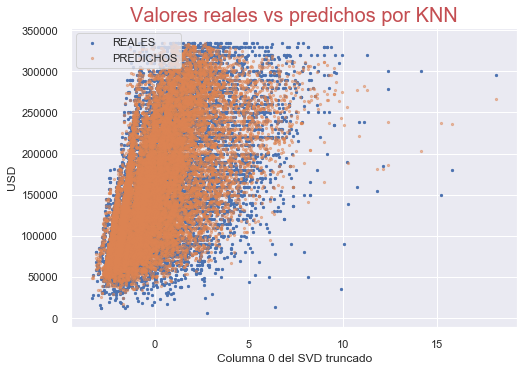

In [61]:
plt.scatter(X_test[:,0], y_test,s=5,label='REALES')
plt.scatter(X_test[:,0], ky_test_pred,s=5,alpha=0.5,label='PREDICHOS')
plt.title('Valores reales vs predichos por KNN',color='r',fontsize=20)
plt.ylabel('USD')
plt.xlabel('Columna 0 del SVD truncado')
plt.legend(loc='upper left')
plt.show()

In [62]:
s = time.time()
Klista_RMSE_train = []
Klista_RMSE_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:

    # Definir el modelo con el valor de vecinos deseado
    regK = KNeighborsRegressor(n_neighbors = k, n_jobs = -1) #con n_jobs= none sube 140% el tiempo de proceso

    # Entrenar el modelo
    regK.fit(X_train,y_train)

    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = regK.predict(X_train)
    train_rmse = (mean_squared_error(y_train, y_train_pred))**(1/2)

    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = regK.predict(X_test)
    test_rmse = (mean_squared_error(y_test, y_test_pred))**(1/2)

    # Agregar la información a las listas
    Klista_RMSE_train.append(train_rmse)
    Klista_RMSE_test.append(test_rmse)
e = time.time()
print('Tiempo de proceso =',e - s)

Tiempo de proceso = 12.22050952911377


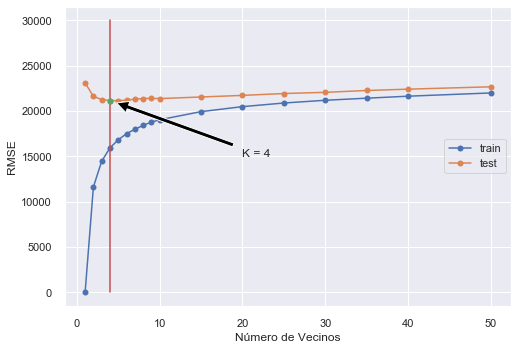

In [63]:
y1=np.linspace(0,30000,2)
x1=y1*0+4
 
plt.plot(k_vecinos,Klista_RMSE_train,'o-',label='train' )
plt.plot(k_vecinos,Klista_RMSE_test,'o-',label='test')
plt.plot(x1,y1,color='r')
plt.legend(loc='center right')
plt.xlabel('Número de Vecinos')
plt.ylabel('RMSE')
plt.plot([4], [Ktest_RMSE], 'o',color='g')
plt.annotate('K = 4', xy=(4, Ktest_RMSE), xytext=(20,15000 ),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++</br> DECISION TREE

In [64]:
reg_tree = DecisionTreeRegressor(max_depth = 11, random_state=13)
reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=11,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=13, splitter='best')

In [65]:
reg_tree.fit(X_train,y_train)
ty_train_pred = reg_tree.predict(X_train)
ty_test_pred = reg_tree.predict(X_test)

In [66]:
Ttrain_RMSE = mean_squared_error(y_train, ty_train_pred, squared = False)
Ttest_RMSE = mean_squared_error(y_test, ty_test_pred, squared = False)
Ttrain_MAE =mean_absolute_error(y_train,ty_train_pred)
Ttest_MAE =mean_absolute_error(y_test,ty_test_pred)
print('Raíz del error cuadrático medio en Train:', Ttrain_RMSE)
print('Raíz del error cuadrático medio en Test:',Ttest_RMSE)
print('Media del error absoluto en Train:',Ttrain_MAE)
print('Media del error absoluto en Test:',Ttest_MAE)

Raíz del error cuadrático medio en Train: 19845.305329125298
Raíz del error cuadrático medio en Test: 23928.942164178254
Media del error absoluto en Train: 12834.256082760805
Media del error absoluto en Test: 15220.058533131943


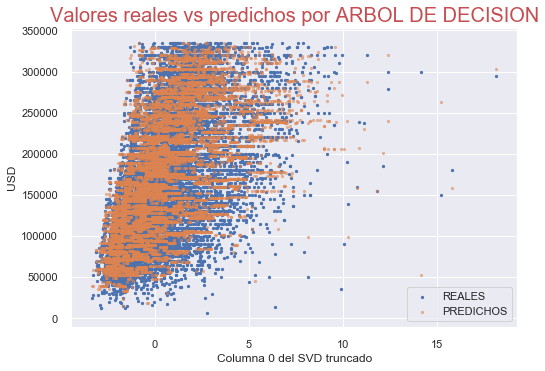

In [67]:
plt.scatter(X_test[:,0], y_test,s=5,label='REALES')
plt.scatter(X_test[:,0], ty_test_pred,s=5,alpha=0.5,label='PREDICHOS')
plt.title('Valores reales vs predichos por ARBOL DE DECISION',color='r',fontsize=20)
plt.ylabel('USD')
plt.xlabel('Columna 0 del SVD truncado')
plt.legend(loc='lower right')
plt.show()

In [68]:
s = time.time()
Tlista_RMSE_train = []
Tlista_RMSE_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10,11,12,15,20,30,40,50]

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad
    regT = DecisionTreeRegressor(max_depth = max_depth, random_state=13)
    
    # Entrenar el modelo
    regT.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = regT.predict(X_train)
    train_RMSE = mean_squared_error(y_train, y_train_pred, squared = False)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = regT.predict(X_test)
    test_RMSE = mean_squared_error(y_test, y_test_pred, squared = False)
    
    # Agregar la información a las listas
    Tlista_RMSE_train.append(train_RMSE)
    Tlista_RMSE_test.append(test_RMSE)
e = time.time()
print('Tiempo de proceso =',e - s)

Tiempo de proceso = 4.724093675613403


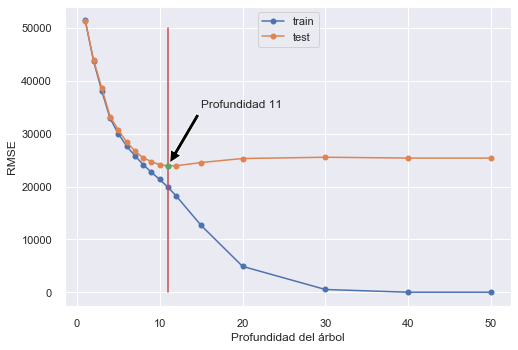

In [69]:
y1=np.linspace(1,50000,2)
x1=y1*0+11
plt.plot(max_depths,Tlista_RMSE_train,'o-',label='train' )
plt.plot(max_depths,Tlista_RMSE_test,'o-',label='test')
plt.legend(loc=9)
plt.plot(x1,y1,color='r')
plt.xlabel('Profundidad del árbol')
plt.ylabel('RMSE')
plt.plot([11], [Ttest_RMSE], 'o')
plt.annotate('Profundidad 11', xy=(11, Ttest_RMSE), xytext=(15,35000 ),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++</br> REGRESION LINEAL

In [70]:
# Definir el modelo con el valor de profundidad
regL = LinearRegression(fit_intercept = False, n_jobs = -1)
    
# Entrenar el modelo
regL.fit(X_train,y_train)
    
# Predecir y evaluar sobre el set de entrenamiento
ly_train_pred = regL.predict(X_train)
Ltrain_RMSE = mean_squared_error(y_train, ly_train_pred, squared = False)
    
# Predecir y evaluar sobre el set de evaluación
ly_test_pred = regL.predict(X_test)

Ltrain_RMSE =mean_squared_error(y_train, ly_train_pred, squared = False)
Ltest_RMSE = mean_squared_error(y_test, ly_test_pred, squared = False)
Ltrain_MAE = mean_absolute_error(y_train,ly_train_pred)
Ltest_MAE =  mean_absolute_error(y_test,ly_test_pred)
print('Raíz del error cuadrático medio en Train:', Ltrain_RMSE)
print('Raíz del error cuadrático medio en Test:',Ltest_RMSE)
print('Media del error absoluto en Train:',Ltrain_MAE)
print('Media del error absoluto en Test:',Ltest_MAE)
    
#parametros de la recta
m,b=regL.coef_, regL.intercept_

Raíz del error cuadrático medio en Train: 161175.96850357144
Raíz del error cuadrático medio en Test: 161771.28845320662
Media del error absoluto en Train: 158278.6720643395
Media del error absoluto en Test: 158797.948210915


Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 15929.646273472019
Raíz del error cuadrático medio en Test: 21156.29962607377


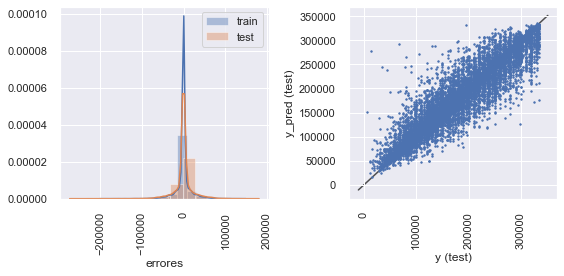

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 19845.305329125298
Raíz del error cuadrático medio en Test: 23928.942164178254


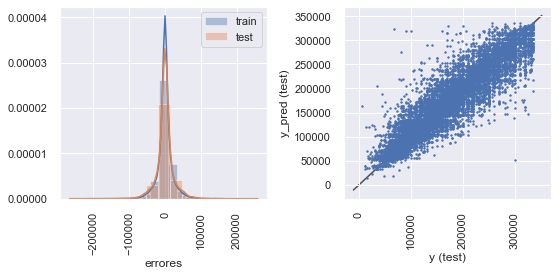

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 161175.96850357144
Raíz del error cuadrático medio en Test: 161771.28845320662


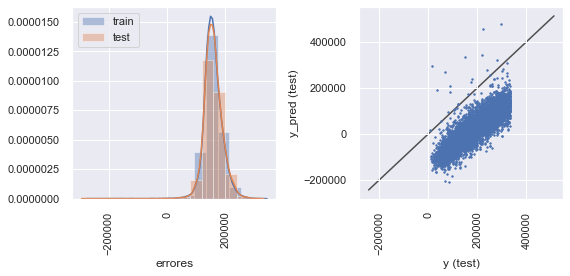

In [71]:
modelos = ['Vecinos más cercanos','Árbol de Decisión','Regresión lineal' ]

for i, model in enumerate([reg_knn, reg_tree, regL]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train= mean_squared_error(y_train, y_train_pred, squared = False)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 15, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 15, label = 'test')
    plt.xlabel('errores')
    plt.xticks(rotation = 90)
    #plt.axis([-100000, 100000, 0, 1])
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.xticks(rotation = 90)
     
    plt.tight_layout()
    plt.show()

In [72]:
print('Training score KNN :  {}'.format(reg_knn.score(X_train, y_train)))
print('Test score KNN     :  {}'.format(reg_knn.score(X_test, y_test)))
print('Training score Tree:  {}'.format(reg_tree.score(X_train, y_train)))
print('Test score Tree    :  {}'.format(reg_tree.score(X_test, y_test)))
print('Training score Line:  {}'.format(regL.score(X_train, y_train)))
print('Test score Line    :  {}'.format(regL.score(X_test, y_test)))

Training score KNN :  0.9491847835471827
Test score KNN     :  0.9121196429495853
Training score Tree:  0.9211326795486322
Test score Tree    :  0.8875759064551854
Training score Line:  -4.202140681410802
Test score Line    :  -4.138250623514606


In [73]:
print('RMSE KNN test :  {}'.format(Ktest_RMSE))
print('RMSE TREE test:  {}'.format(Ttest_RMSE))
print('RMSE REGR test: {}'.format(Ltest_RMSE))

RMSE KNN test :  21156.29962607377
RMSE TREE test:  23928.942164178254
RMSE REGR test: 161771.28845320662


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

PARTE B - Modelos Avanzados

Elige dos de los modelos avanzados vistos (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.


<font color = 'red'>

Aunque el RMSE haya bajado bastante en Regresion Lineal y se acerco al KNN y  Decision Tree, no es suficiente para superar a al de KNN, asi que yo me quedo con el KNN para este modelo, ya que tienen una diferencia de mas del 10%

In [74]:
del X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(M,y,test_size=0.25,stratify=None, random_state=13)

In [75]:
#from sklearn.model_selection import cross_validate
import scipy as sp
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

KNN Randomized Search</br>+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

<font color = 'red'>
 

In [76]:
knn = KNeighborsRegressor(n_jobs=-1)

In [77]:
# Grilla para Random Search KNN
param_dist = {'n_neighbors':sp.stats.randint(1,20),
              'algorithm':['auto', 'kd_tree'],
              'leaf_size':[1,5,10,20,30,40,]}

In [78]:
modelKNN = RandomizedSearchCV(knn, param_dist, random_state = 0, cv = 6, return_train_score = True, scoring = None, verbose = 7, n_jobs = -1)
modelKNN.fit(X_train, y_train)

Fitting 6 folds for each of 10 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  54 out of  60 | elapsed:   22.7s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   26.0s finished


RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None, n_jobs=-1,
                                                 n_neighbors=5, p=2,
                                                 weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'kd_tree'],
                                        'leaf_size': [1, 5, 10, 20, 30, 40],
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002315198A610>},
                   pre_dispatch='2*n_jobs', random_state=0, refit=True,
                   return_train_score=True, scoring=None, verbose=7)

In [79]:
print("Mejores parametros: "+str(modelKNN.best_params_))
print("Mejor Score: "+str(modelKNN.best_score_)+'\n')

scores = pd.DataFrame(modelKNN.cv_results_)
scores

Mejores parametros: {'algorithm': 'kd_tree', 'leaf_size': 20, 'n_neighbors': 4}
Mejor Score: 0.9084242909886746



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,params,split0_test_score,split1_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.257331,0.051098,0.190668,0.114294,auto,40,1,"{'algorithm': 'auto', 'leaf_size': 40, 'n_neig...",0.888643,0.882408,...,0.004428,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.371498,0.059062,0.395169,0.101104,kd_tree,20,4,"{'algorithm': 'kd_tree', 'leaf_size': 20, 'n_n...",0.909076,0.907544,...,0.001664,1,0.947079,0.947684,0.947224,0.947542,0.947367,0.947130,0.947338,0.000218
2,0.392998,0.028867,0.995336,0.098836,kd_tree,5,19,"{'algorithm': 'kd_tree', 'leaf_size': 5, 'n_ne...",0.904864,0.902990,...,0.001431,8,0.914449,0.914928,0.914641,0.914573,0.914820,0.914441,0.914642,0.000181
3,0.766332,0.118705,1.331179,0.333828,auto,1,13,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.907636,0.905246,...,0.001327,3,0.920649,0.921494,0.921004,0.920815,0.920925,0.920490,0.920896,0.000317
4,0.610538,0.117082,0.880873,0.294832,auto,5,7,"{'algorithm': 'auto', 'leaf_size': 5, 'n_neigh...",0.909653,0.906527,...,0.001659,2,0.932692,0.933315,0.933277,0.932990,0.933316,0.932347,0.932989,0.000364
5,0.700834,0.074102,0.962667,0.223027,kd_tree,1,18,"{'algorithm': 'kd_tree', 'leaf_size': 1, 'n_ne...",0.905479,0.903229,...,0.001393,7,0.915411,0.915862,0.915677,0.915422,0.915591,0.915213,0.915529,0.000209
6,0.708922,0.158205,1.071020,0.533974,kd_tree,5,14,"{'algorithm': 'kd_tree', 'leaf_size': 5, 'n_ne...",0.907441,0.904732,...,0.001340,4,0.919490,0.920122,0.919804,0.919586,0.919718,0.919353,0.919679,0.000246
7,0.512311,0.138096,0.856193,0.188191,auto,5,17,"{'algorithm': 'auto', 'leaf_size': 5, 'n_neigh...",0.906034,0.903819,...,0.001484,6,0.916330,0.916815,0.916536,0.916308,0.916469,0.916076,0.916422,0.000227
8,0.527740,0.145979,0.845997,0.164731,kd_tree,40,16,"{'algorithm': 'kd_tree', 'leaf_size': 40, 'n_n...",0.906692,0.904331,...,0.001426,5,0.917343,0.917852,0.917598,0.917328,0.917550,0.916957,0.917438,0.000278
9,0.680103,0.106727,1.032270,0.188492,kd_tree,1,19,"{'algorithm': 'kd_tree', 'leaf_size': 1, 'n_ne...",0.904864,0.902990,...,0.001431,8,0.914449,0.914928,0.914641,0.914573,0.914820,0.914441,0.914642,0.000181


Decision Tree Randomized Search</br>+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [80]:
tree=DecisionTreeRegressor()
# Grilla para Random Search
param_dist = {'max_depth':sp.stats.randint(1, 50)}

In [81]:
modelTREE = RandomizedSearchCV(tree, param_dist, random_state = 13, cv = 6, return_train_score = True, scoring = None, verbose = 6, n_jobs = -1,n_iter=40)
modelTREE.fit(X_train, y_train)

Fitting 6 folds for each of 40 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   19.8s finished


RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [82]:
print("Mejores parametros: "+str(modelTREE.best_params_))
print("Mejor Score: "+str(modelTREE.best_score_)+'\n')

scores = pd.DataFrame(modelTREE.cv_results_)
scores

Mejores parametros: {'max_depth': 11}
Mejor Score: 0.8821473945368847



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.608331,0.026616,0.006668,0.001106,19,{'max_depth': 19},0.860877,0.865815,0.868432,0.869528,...,0.004079,13,0.992901,0.993133,0.992915,0.994054,0.994685,0.993925,0.993602,6.663587e-04
1,0.677167,0.024141,0.009998,0.004863,49,{'max_depth': 49},0.857282,0.863351,0.868919,0.865558,...,0.004984,23,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
2,0.446830,0.020746,0.003843,0.000356,11,{'max_depth': 11},0.879895,0.886041,0.882854,0.882036,...,0.002438,2,0.923672,0.923551,0.925376,0.923247,0.925071,0.923557,0.924079,8.244043e-04
3,0.628499,0.065273,0.006168,0.000687,17,{'max_depth': 17},0.863965,0.870925,0.872157,0.873098,...,0.003841,10,0.984439,0.984576,0.984840,0.986141,0.986765,0.985551,0.985385,8.515171e-04
4,0.689833,0.018261,0.007000,0.001154,39,{'max_depth': 39},0.855893,0.863488,0.864070,0.867546,...,0.005476,35,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
5,0.680705,0.027112,0.007834,0.002795,35,{'max_depth': 35},0.858848,0.861054,0.866760,0.863294,...,0.004403,29,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.714392e-12
6,0.709937,0.026635,0.009999,0.003649,26,{'max_depth': 26},0.858069,0.862217,0.863805,0.864844,...,0.004503,28,0.999725,0.999818,0.999730,0.999924,0.999908,0.999831,0.999823,7.700537e-05
7,0.714665,0.023207,0.008001,0.001825,45,{'max_depth': 45},0.855433,0.862759,0.863502,0.866168,...,0.004982,36,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
8,0.702001,0.041925,0.007334,0.001374,36,{'max_depth': 36},0.858121,0.861943,0.866350,0.867111,...,0.004428,22,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
9,0.686500,0.036110,0.007334,0.000943,27,{'max_depth': 27},0.856596,0.860642,0.861841,0.868054,...,0.004604,30,0.999867,0.999897,0.999854,0.999973,0.999951,0.999916,0.999910,4.251506e-05


In [83]:
tree2=DecisionTreeRegressor(random_state=13)
param_dist =  {'max_depth':np.arange(7,18,1),
              'splitter':['best','random']}

In [84]:
modelTREE = GridSearchCV(tree2, param_dist, cv=15, return_train_score = True, scoring = None, verbose = 6, n_jobs = -1)
modelTREE.fit(X_train, y_train)

Fitting 15 folds for each of 22 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 297 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed:   15.8s finished


GridSearchCV(cv=15, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=13, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
                         'splitter': ['best', 'random']},
             pre_dispatch='2*n_jobs', refit=True, retu

In [85]:
print("Mejores parametros: "+str(modelTREE.best_params_))
print("Mejor Score: "+str(modelTREE.best_score_)+'\n')

scores = pd.DataFrame(modelTREE.cv_results_)
scores

Mejores parametros: {'max_depth': 11, 'splitter': 'best'}
Mejor Score: 0.8841218061532655



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,...,split7_train_score,split8_train_score,split9_train_score,split10_train_score,split11_train_score,split12_train_score,split13_train_score,split14_train_score,mean_train_score,std_train_score
0,0.378117,0.033979,0.002401,0.000494,7,best,"{'max_depth': 7, 'splitter': 'best'}",0.863043,0.855252,0.854051,...,0.866826,0.865730,0.866180,0.866825,0.866490,0.866933,0.866272,0.866972,0.866489,0.000510
1,0.063199,0.013484,0.003001,0.002000,7,random,"{'max_depth': 7, 'splitter': 'random'}",0.756767,0.736428,0.751757,...,0.745071,0.683774,0.742629,0.722107,0.743239,0.687193,0.754921,0.687004,0.732798,0.024591
2,0.449799,0.055853,0.002733,0.001390,8,best,"{'max_depth': 8, 'splitter': 'best'}",0.877698,0.864278,0.869079,...,0.883183,0.882362,0.883019,0.883938,0.883359,0.883634,0.883145,0.883677,0.883218,0.000459
3,0.077268,0.017705,0.002865,0.001090,8,random,"{'max_depth': 8, 'splitter': 'random'}",0.787413,0.786824,0.696138,...,0.784792,0.812946,0.778794,0.786876,0.777757,0.769933,0.766888,0.772345,0.765111,0.034067
4,0.427894,0.024637,0.002734,0.000998,9,best,"{'max_depth': 9, 'splitter': 'best'}",0.886521,0.871426,0.877051,...,0.897086,0.896076,0.896766,0.898005,0.897580,0.897528,0.896728,0.897398,0.897000,0.000547
5,0.080007,0.016736,0.002466,0.000499,9,random,"{'max_depth': 9, 'splitter': 'random'}",0.794874,0.822289,0.823566,...,0.808658,0.824217,0.776392,0.833774,0.820145,0.843589,0.819576,0.842756,0.822077,0.019055
6,0.491986,0.034827,0.002734,0.000997,10,best,"{'max_depth': 10, 'splitter': 'best'}",0.892055,0.875115,0.883029,...,0.909625,0.909074,0.909147,0.910686,0.910210,0.909935,0.908865,0.909880,0.909575,0.000527
7,0.083202,0.016715,0.002732,0.000773,10,random,"{'max_depth': 10, 'splitter': 'random'}",0.812774,0.837062,0.823576,...,0.841066,0.848996,0.861349,0.847351,0.826119,0.858852,0.836352,0.843563,0.840752,0.012928
8,0.500677,0.024950,0.003538,0.002177,11,best,"{'max_depth': 11, 'splitter': 'best'}",0.893283,0.875140,0.886433,...,0.922891,0.922110,0.922098,0.923816,0.923074,0.922848,0.921724,0.921836,0.922397,0.000578
9,0.095839,0.008865,0.003736,0.002351,11,random,"{'max_depth': 11, 'splitter': 'random'}",0.857789,0.858191,0.856546,...,0.868349,0.827601,0.846185,0.870989,0.871940,0.840388,0.859698,0.849064,0.857964,0.012832


In [86]:
from sklearn.preprocessing import PolynomialFeatures

In [87]:
def evaluar_regresion(model, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ### CALCULAMOS EL ERROR
    rmse_train = mean_squared_error(y_train, y_train_pred,squared=False)
    rmse_test = mean_squared_error(y_test, y_test_pred,squared=False)

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test : {rmse_test}')

    
    ### GRAFICAMOS LOS RESULTADOS
    plt.figure(figsize = (12,4))
    plt.subplot(1,3,1)

    
    list1, list2 = zip(*sorted(zip(X_train[:,0], y_train_pred)))
    plt.scatter(list1, list2,label ='Regresión (train)',alpha = 0.5, s = 5)
    
    list1, list2 = zip(*sorted(zip(X_test[:,0], y_test_pred)))
    plt.scatter(list1, list2,label = 'Regresión (test)',alpha = 0.5, s = 5)

    
    #plt.scatter(X_train[:,0],y_train_pred,label ='Regresión (train)', s = 8)
    #plt.scatter(X_test[:,0],y_test_pred,label = 'Regresión (test)', s = 8)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()


    plt.subplot(1,3,2)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,3,3)
    ax.scatter(y_test,y_test_pred, s =2)

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()

In [88]:
poly = PolynomialFeatures(degree = 3, include_bias = False)
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)
print(X_train_new.shape, X_test_new.shape)

(58201, 34) (19401, 34)


In [89]:
X_train_new[0:1,:]

array([[-0.53178964, -1.35899049, -0.7442151 ,  0.79145862,  0.28280022,
         0.72269706,  0.39576588, -0.42088949,  1.84685516,  1.01138125,
        -1.07558474,  0.55385612, -0.58901546,  0.62640675, -0.15039023,
        -0.38432281, -0.21046419,  0.22382467, -0.98213844, -0.53784207,
         0.57198482, -0.29453494,  0.31323232, -0.33311662, -2.50985861,
        -1.3744575 ,  1.46170944, -0.7526852 ,  0.80046641, -0.85128081,
        -0.41218809,  0.4383542 , -0.46618136,  0.49577502]])

In [90]:
reg_2 = LinearRegression()
reg_2.fit(X_train_new, y_train)
print(reg_2.coef_, reg_2.intercept_)
y_train_pred_2 = reg_2.predict(X_train_new)
y_test_pred_2 = reg_2.predict(X_test_new)

[ 1.97050494e+04  1.93418032e+03  5.35761950e+04 -6.79227476e+03
 -7.75092568e+01 -9.48070559e+02 -4.76870549e+03  2.78280274e+03
  4.05861011e+03  1.84504335e+03 -3.34651009e+03  8.81987919e+03
 -3.07569901e+03 -3.38210652e+03 -1.99827038e+01 -7.46808733e+01
 -1.50148623e+02 -7.78122984e+01 -2.86595747e+02 -5.49097551e+02
 -2.98814669e+02 -1.89095266e+03  1.39876737e+03  9.42845534e+02
  2.40342588e+02  1.88155297e+03  2.07387183e+03  7.20122726e+02
 -2.40980231e+03 -5.08094133e+03 -2.34919336e+02  1.48686405e+02
  7.57551169e+02  9.96004588e+02] 147740.0394511626


Raíz del error cuadrático medio en Train: 26274.28206895861
Raíz del error cuadrático medio en Test : 26476.39976221384


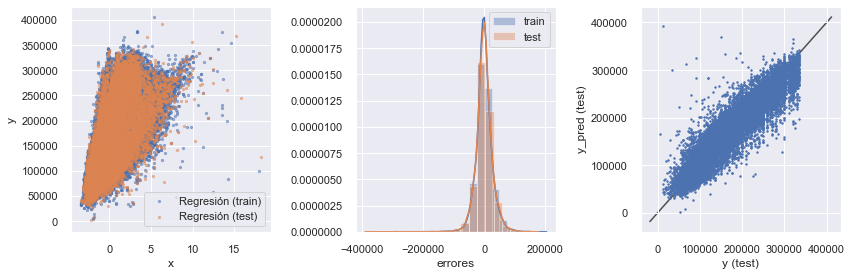

In [91]:
evaluar_regresion(reg_2,  X_train_new, X_test_new, y_train, y_test)

In [92]:
from sklearn.linear_model import Ridge, Lasso

In [93]:
reg_ridge = Ridge(alpha= 10)
reg_ridge.fit(X_train_new,y_train)

y_train_pred_ridge = reg_ridge.predict(X_train_new)
y_test_pred_ridge = reg_ridge.predict(X_test_new)
print(f'Pendientes: {reg_ridge.coef_}')
print(f'Ordenada: {reg_ridge.intercept_}')
print(f'Iteraciones: {reg_ridge.n_iter_}')

Pendientes: [ 1.97012926e+04  1.93642223e+03  5.35366923e+04 -6.76543004e+03
 -7.85618723e+01 -9.47625987e+02 -4.76775636e+03  2.78222233e+03
  4.05759027e+03  1.84678838e+03 -3.34576413e+03  8.81843694e+03
 -3.06845222e+03 -3.38247297e+03 -1.98976642e+01 -7.48900579e+01
 -1.50098848e+02 -7.76490650e+01 -2.85526440e+02 -5.49387977e+02
 -2.99977976e+02 -1.88976162e+03  1.39996922e+03  9.43575436e+02
  2.39687177e+02  1.88517857e+03  2.07292739e+03  7.21805678e+02
 -2.41853000e+03 -5.07354221e+03 -2.32143677e+02  1.51158469e+02
  7.68800008e+02  9.82310471e+02]
Ordenada: 147741.99241827245
Iteraciones: None


Raíz del error cuadrático medio en Train: 26274.289997962835
Raíz del error cuadrático medio en Test : 26476.534821328227


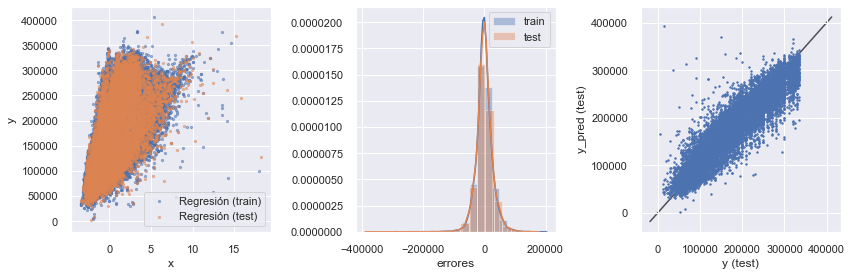

In [94]:
evaluar_regresion(reg_ridge, X_train_new, X_test_new, y_train, y_test)

In [95]:
s = time.time()
reg_lasso = Lasso(alpha =10,max_iter=3000)
reg_lasso.fit(X_train_new,y_train)

y_train_pred_lasso = reg_lasso.predict(X_train_new)
y_test_pred_lasso = reg_lasso.predict(X_test_new)

print(f'Pendientes: {reg_lasso.coef_}')
print(f'Ordenada: {reg_lasso.intercept_}')
print(f'Iteraciones: {reg_lasso.n_iter_}')
e = time.time()
print('Tiempo de proceso =',e - s)

Pendientes: [ 1.97335408e+04  1.77166475e+03  5.35569435e+04 -6.59252707e+03
 -8.31664304e+01 -9.22157313e+02 -4.74577556e+03  2.76135275e+03
  4.02158359e+03  1.77245068e+03 -3.29884703e+03  8.79817975e+03
 -3.02987983e+03 -3.35563079e+03 -1.97895345e+01 -7.56373784e+01
 -1.52203738e+02 -7.57086485e+01 -2.85795866e+02 -5.35001801e+02
 -2.98486933e+02 -1.88757299e+03  1.38438636e+03  9.36532844e+02
  2.47313300e+02  1.86465589e+03  2.03217413e+03  7.14193931e+02
 -2.37235385e+03 -4.94593809e+03 -2.33032480e+02  1.35796348e+02
  7.33472419e+02  8.68107591e+02]
Ordenada: 147802.39101394406
Iteraciones: 281
Tiempo de proceso = 1.442993402481079


Raíz del error cuadrático medio en Train: 26274.493334816394
Raíz del error cuadrático medio en Test : 26475.922073799265


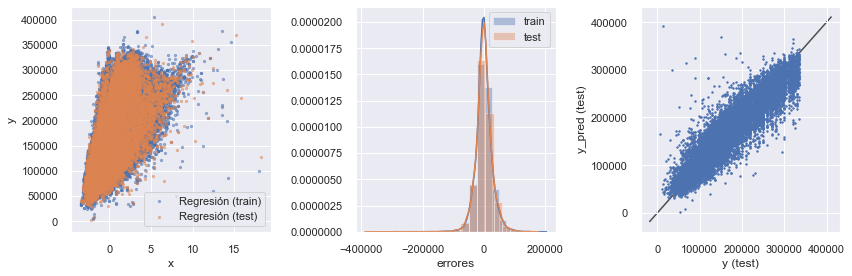

In [96]:
evaluar_regresion(reg_lasso, X_train_new, X_test_new, y_train, y_test)

<font color ='orange'>
Cuando aumento las caracteristicas polinomiales de 4 en adelante empiezo a tener valores negativos aunque todavia baja mil del RMSE. </br> ya de 6 en adelante tiene un sobre ajuste grande e incrementa el RMSE a mas de 100 000 </br>Con 7 y max_iter=1000000, tuve el caso de que en regresion con Lasso no convergio despues de mas de 12 horas de proceso</br>
<font color = 'red'>ConvergenceWarning: <font color ='orange'>Objective did not converge. You might want to increase the number of iterations. Duality gap: 15029838756549.748, tolerance: 29063568107.603127
  model = cd_fast.enet_coordinate_descent(

PARTE C - Interpretación de modelos

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:


¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. 

<font color = 'red'>
Respondiendo de una forma conservadora, diria que los que tuvieron mayor correlacion en el EDA. </br>
Pero como se uso una reduccion de dimension basada en SVD, se pierde informacion de cuales features fueron las mas influyentes originalmente.</br>
Ya en lo demas se dejo a los modelos matematicos hacer su trabajo.</br> Al final con los atributos polinomicos las pendientes mas importantes son las que estan por el orden de las decenas de millar (las que tienen exp 4) calculados en la regresion

¿En qué se diferencian esos árboles? ¿Por qué?

<font color = 'red'>
    La diferncia esta en los datos que alimentaron el modelo, ya que se usaron mas features, fueron escalados y transformados

¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

<font color = 'red'>
Fue mejor de lo que esperaba, obtuve un septimo de error comparado con el proyecto 1

¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?
? DESAFÍO OPCIONAL

Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?

<font color = 'red'>
    La distribucion es normal y con moda 0 cuando se implemento atributos polinomicos, antes de eso estaba cerca de 200,000.00, y tambien hacia parecer que las transformaciones previas no habian tenido mucho sentido, ya que daba el RMSE paracido a el proyecto 1
    

Conclusiones:</br>
<font color = 'gray'>
    En el preproceso de los datos es importante tomarse el tiempo para estar determinando que features sirven, o justificar su eliminacion. </br>
    La forma de llenado de datos faltantes si influye en las metricas de valoracion del modelo, a mi mejoro alrededor del 10%, los llene observando con que otros esataban correlacionados. </br>
    Y basicamente la mejora de los modelos de este proyecto surgio a partir de los tratamientos de los datos, sobre todo de la normalizacion. </br>
    La reduccion de dimensiones, ayudo a que los tiempos de proceso fueran mas cortos.</br>
    Trabajar grillas ahorra tiempo de codigo de busqueda de parametros optimos para modelos basicos, y es parecido a hacer un for. </br>
    Una regresion lineal no fue ideal en este desarrollo, se necesito agregarle atributos polinomicos para que la regresion lineal fuera mas acertada</br>
    
    

Checklist de evaluación
Sugerencias para desarrollar el proyecto:

Este proyecto no cuenta con mínimos entregables indicados en la consigna, pero ten en cuenta lo siguiente:
en la Parte A debes implementar al menos tres de las transformaciones de datos propuestas.
en la Parte B, al menos un modelo debe ser optimizado por Grid Search o Random Search; el otro puede ser optimizado por búsqueda manual (es decir, puedes dejar los mejores parámetros que encontraste probando ).
en la Parte C, debes responder al menos una pregunta. Obviamente, ¡cuanto más hagas, más aprenderás y mejor será tu proyecto!

La resolución del proyecto te puede enfrentar a pequeños desafíos que no trabajamos durante los encuentros. Es importante que desarrolles la capacidad de resolverlos. Para ello, consulta las bitácoras, las referencias, los notebooks vistos en clase, la documentación de la librería y, sobre todo, googlea .

Antes de subir tu proyecto a la plataforma Acámica para que sea evaluado, verifica que el Notebook se ejecute sin errores. Además, asegúrate de cumplir con las siguientes condiciones (son las que los/as evaluadores/as tendrán en consideración al momento de corregir tu trabajo):

PARTE A - Transformación de Datos

Debes justificar por qué creés que las transformaciones elegidas aplican en este dataset.

Debes re entrenar un modelo del Proyecto 01 y comparar su desempeño con el modelo obtenido en el Proyecto 01.

PARTE B - Modelos Avanzados

En la optimización de hiperparámetros, debes justificar los parámetros que elegiste para optimizar y el rango de cada uno.


PARTE C - Interpretación de modelos

Debes estudiar qué variables utiliza el modelo para predecir y responder la pregunta: ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

Es muy importante que analices los errores del modelo. ¿Dónde es mayor el error? ¿dónde acierta?

Debes ser crítico/a con la metodología utilizada. ¿Qué mejorarías?